In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("perrin-freres-monthly-champagne.csv")

df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [19]:
print(df.isnull().sum())    # 返回每一列中的缺失值（NaN）的数量
print(df.isnull().any(axis=1))  # 返回一个布尔序列，标识每一行是否含有缺失值
print(df.iloc[105])   # 查看具体某一行的值，可以通过索引或者iloc属性来实现
print(df.iloc[106])

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
102    False
103    False
104    False
105     True
106     True
Length: 107, dtype: bool
Month                                                     NaN
Perrin Freres monthly champagne sales millions ?64-?72    NaN
Name: 105, dtype: object
Month                                                     Perrin Freres monthly champagne sales millions...
Perrin Freres monthly champagne sales millions ?64-?72                                                  NaN
Name: 106, dtype: object


In [20]:
df.columns=["Month","Sales"]

df = df.dropna() # 删除含有缺失值的行

# 2. 数据类型转换
df['Month'] = pd.to_datetime(df['Month'])

# 3. 设定索引
df = df.set_index('Month')

# 4. 检查数据排序
df = df.sort_index()

df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [21]:
df.shape

(105, 1)

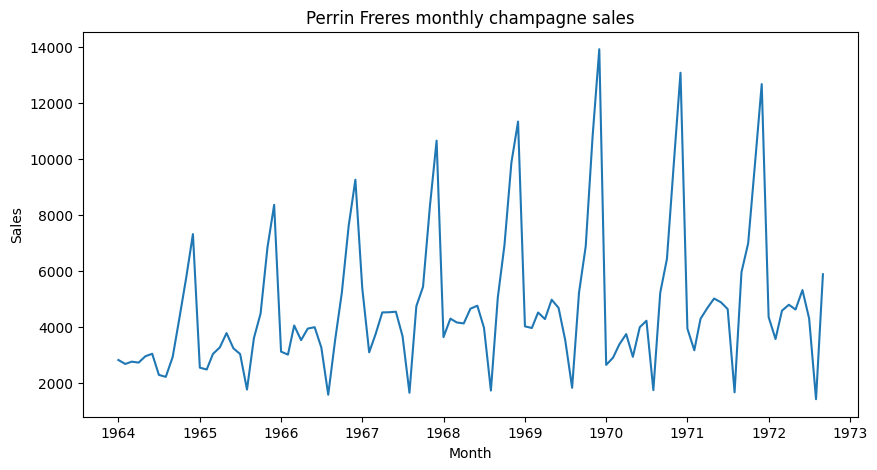

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Perrin Freres monthly champagne sales')
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.833593
p-value: 0.363916
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584


In [24]:
# 首先导入了所需要的库和函数
from statsmodels.tsa.stattools import adfuller

# 定义一个名为calculate_diff的函数，接收三个参数：df是要处理的DataFrame，max_diff是最大的差分步数，significance_level是判定平稳性的显著性水平
def calculate_diff(df, max_diff, significance_level=0.05):
    # 初始化最佳差分阶数和最小p值
    best_diff = None
    min_pvalue = 1.0
    min_variance = float('inf')  # 初始化最小方差
    min_adf_stat = float('inf')  # 初始化最小ADF统计量

    # 循环，差分阶数从1到max_diff
    for i in range(1, max_diff+1):
        # 对数据进行差分，并去除NA值
        df_diff = df['Sales'].diff(i).dropna()  
        # 对差分后的数据进行ADF单位根检验
        result = adfuller(df_diff)
        # 打印出差分阶数，ADF统计量，p值，标准差和方差
        print(f'{i}步差分')
        print('ADF统计量: %f' % result[0])
        print('p值: %.10e' % result[1])  
        print('标准差: %f' % df_diff.std())
        print('方差: %f' % df_diff.var())

        # 判断p值是否小于显著性水平，如果小于则认为差分后的数据可能是平稳的
        if result[1] < significance_level:
            print('=> 根据这个差分阶数，序列可能是平稳的')
            # 判断当前的p值是否小于最小p值，如果小于则更新最小p值和最佳差分阶数
            if result[1] < min_pvalue:
                min_pvalue = result[1]
                best_diff = i
                min_variance = df_diff.var()  # 更新最小方差
                min_adf_stat = result[0]  # 更新最小ADF统计量
        else:
            print('=> 根据这个差分阶数，序列可能是非平稳的')
        print('--------------------------------')

    # 如果找到了使数据平稳的差分阶数，打印出最佳差分阶数和其对应的p值
    if best_diff is not None:
        print(f'最佳差分阶数是: {best_diff}，p值为: {min_pvalue}，方差为: {min_variance}，ADF统计量为: {min_adf_stat}')

# 使用函数对数据进行差分并测试其平稳性
calculate_diff(df, max_diff=24)

1步差分
ADF统计量: -7.189896
p值: 2.5196204474e-10
标准差: 2650.968187
方差: 7027632.326736
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
2步差分
ADF统计量: -7.135995
p值: 3.4199891595e-10
标准差: 3567.635172
方差: 12728020.723015
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
3步差分
ADF统计量: -7.285631
p值: 1.4614244888e-10
标准差: 3927.279877
方差: 15423527.228499
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
4步差分
ADF统计量: -7.253149
p值: 1.7585799499e-10
标准差: 4090.095719
方差: 16728882.992079
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
5步差分
ADF统计量: -2.857117
p值: 5.0566743536e-02
标准差: 3703.192063
方差: 13713631.456465
=> 根据这个差分阶数，序列可能是非平稳的
--------------------------------
6步差分
ADF统计量: -7.278598
p值: 1.5212208958e-10
标准差: 3540.557126
方差: 12535544.759637
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
7步差分
ADF统计量: -1.747472
p值: 4.0683412641e-01
标准差: 3726.756506
方差: 13888714.058069
=> 根据这个差分阶数，序列可能是非平稳的
--------------------------------
8步差分
ADF统计量: -2.055948
p值: 2.6259291600e-01
标准差: 4203.

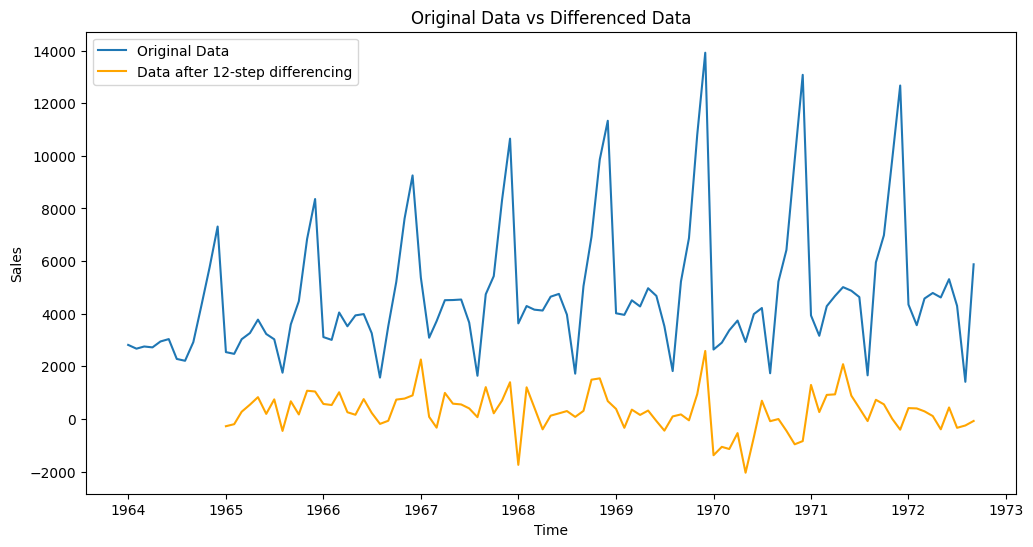

In [25]:
import matplotlib.pyplot as plt

# 设置12步差分
diff_steps = 12
df_diff = df['Sales'].diff(diff_steps).dropna()

plt.figure(figsize=(12,6))

# 绘制原始数据
plt.plot(df['Sales'], label='Original Data')

# 绘制12步差分后的数据
plt.plot(df_diff, label=f'Data after {diff_steps}-step differencing', color='orange')

# 设置标题和标签
plt.title('Original Data vs Differenced Data')
plt.xlabel('Time')
plt.ylabel('Sales')

plt.legend()

plt.show()

In [26]:
df['Sales_Diff_12'] = df['Sales'].diff(12)

In [27]:
df['Sales_Diff_12'].head(20)

Month
1964-01-01      NaN
1964-02-01      NaN
1964-03-01      NaN
1964-04-01      NaN
1964-05-01      NaN
1964-06-01      NaN
1964-07-01      NaN
1964-08-01      NaN
1964-09-01      NaN
1964-10-01      NaN
1964-11-01      NaN
1964-12-01      NaN
1965-01-01   -274.0
1965-02-01   -197.0
1965-03-01    276.0
1965-04-01    545.0
1965-05-01    830.0
1965-06-01    194.0
1965-07-01    746.0
1965-08-01   -453.0
Name: Sales_Diff_12, dtype: float64

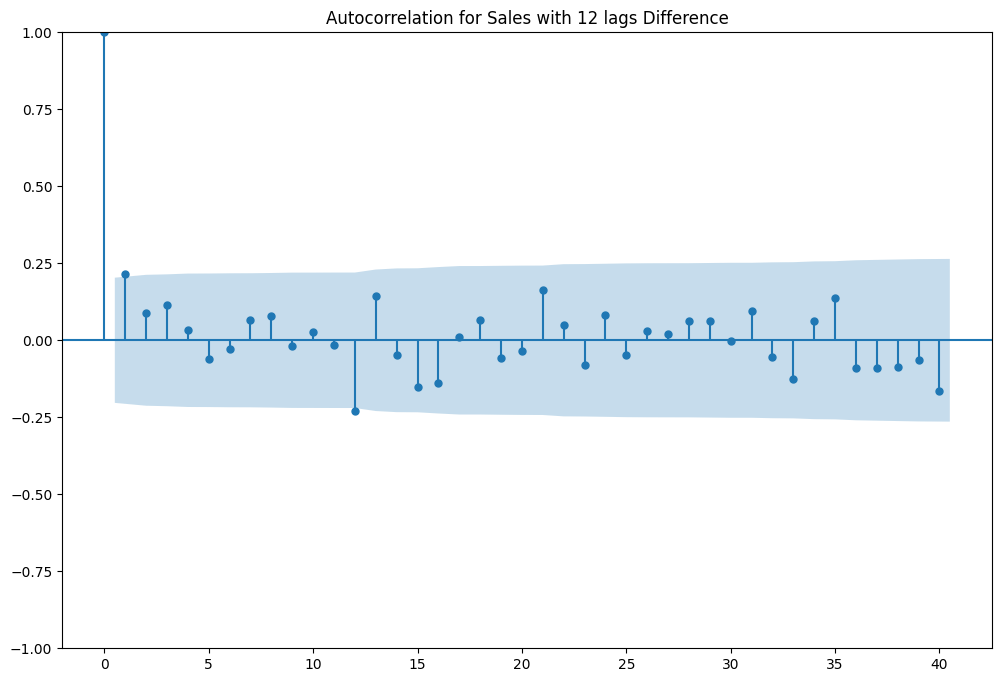

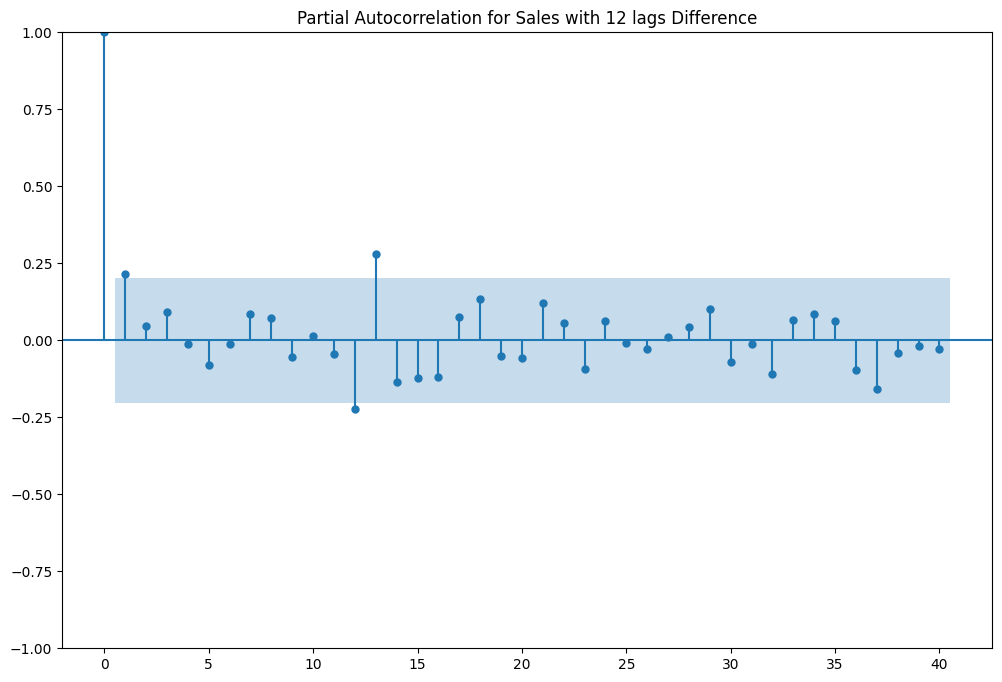

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 绘制ACF图
plt.figure(figsize=(12,8))
plot_acf(df['Sales_Diff_12'].dropna(), lags=40, ax=plt.gca())
plt.title('Autocorrelation for Sales with 12 lags Difference')
plt.show()

# 绘制PACF图
plt.figure(figsize=(12,8))
plot_pacf(df['Sales_Diff_12'].dropna(), lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation for Sales with 12 lags Difference')
plt.show()

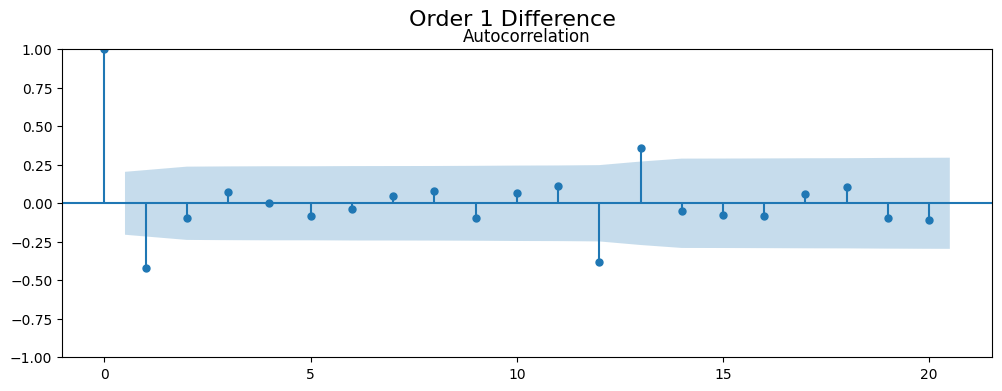

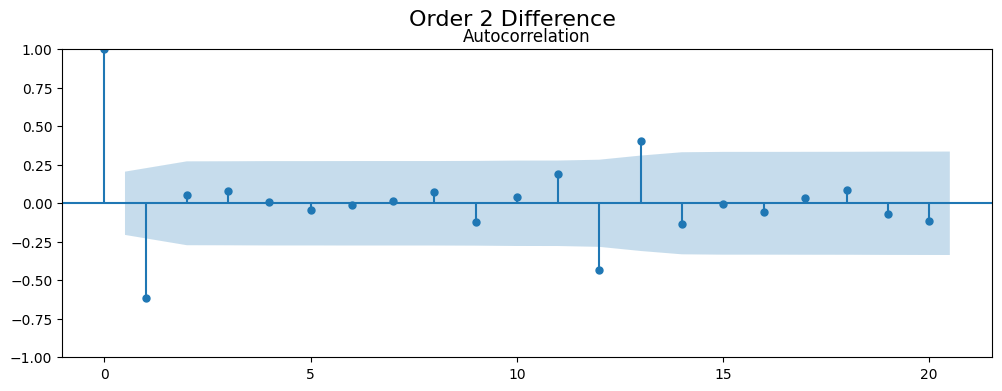

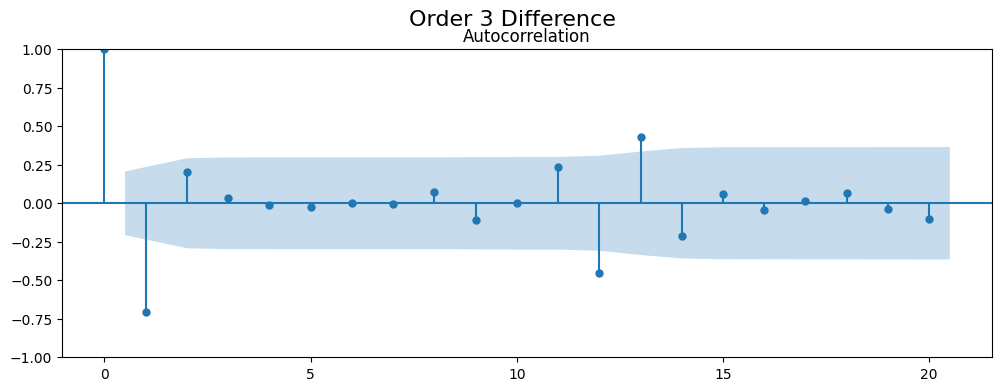

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

def diff(data, order):
    if order == 0:
        return data
    else:
        return diff(data.diff().dropna(), order - 1)

# 循环不同的d值
for d in range(1, 4):
    # 创建新的图形
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Order {d} Difference', fontsize=16)

    # 绘制ACF图
    plot_acf(diff(df['Sales_Diff_12'], d), ax=plt.gca(), title='Autocorrelation')
    plt.show()

In [30]:
df.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

In [31]:
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

In [32]:
df.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', length=105, freq='MS')

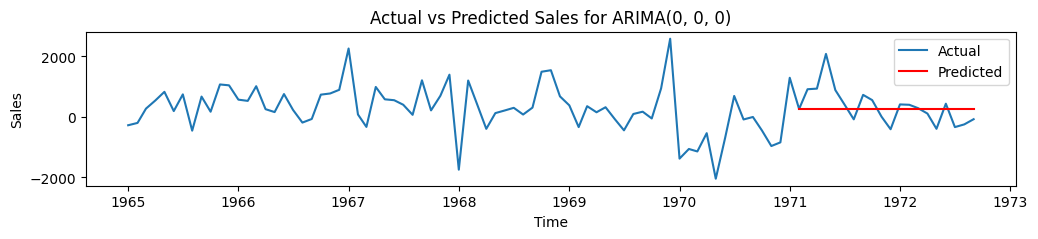

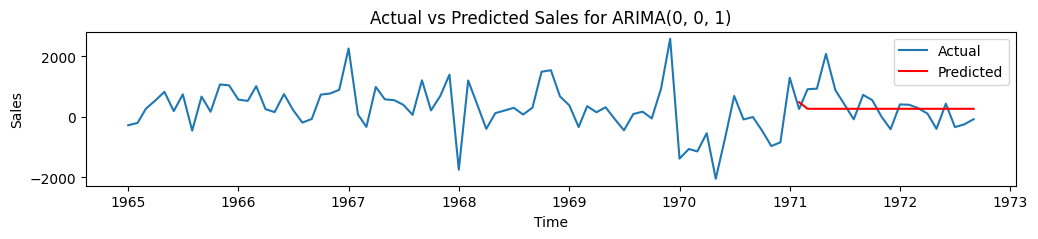

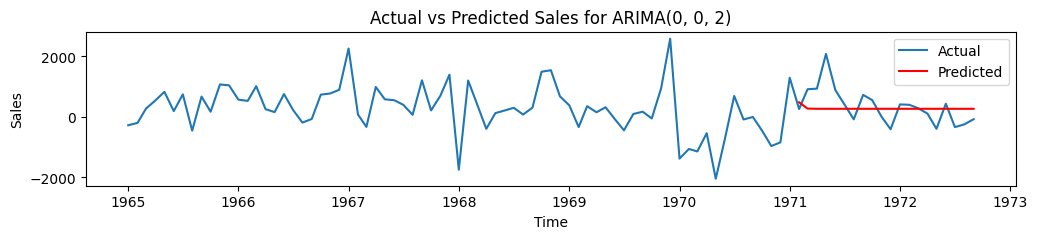

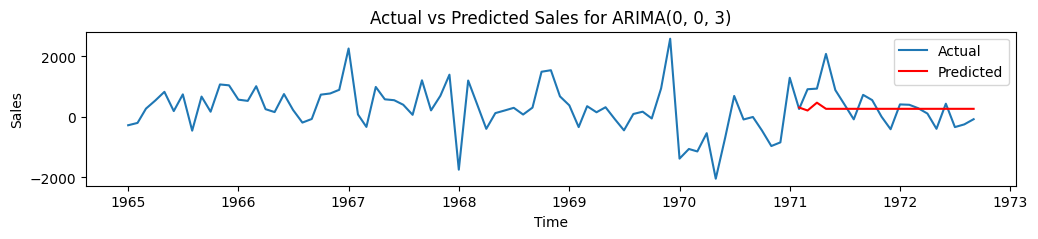

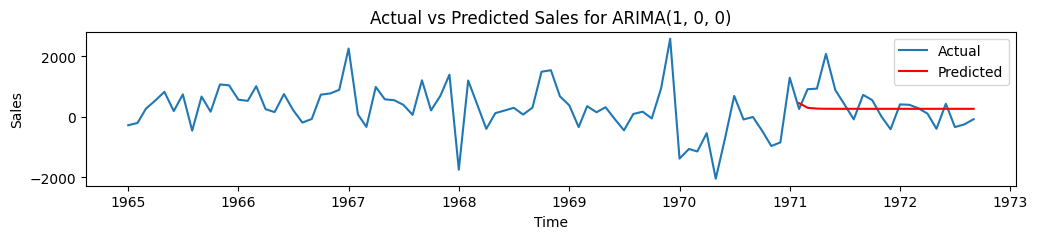

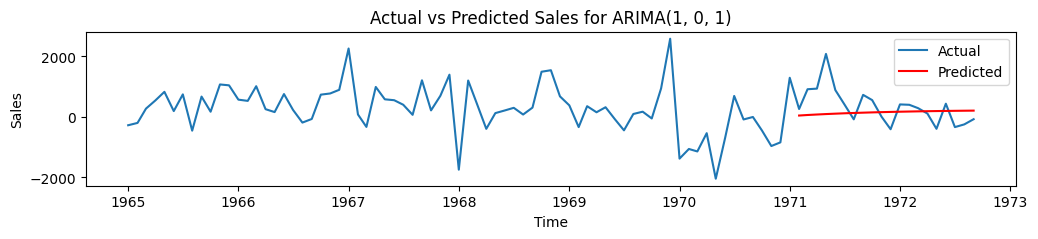

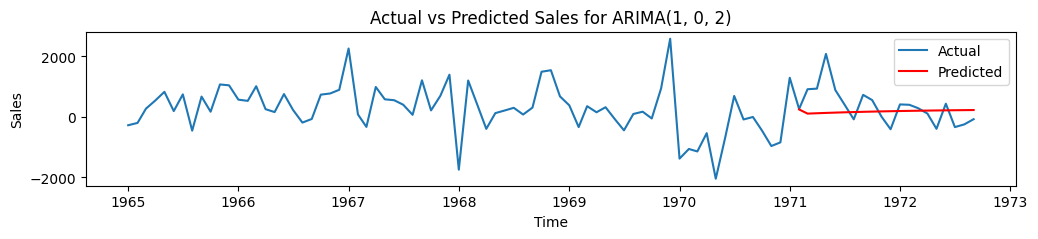

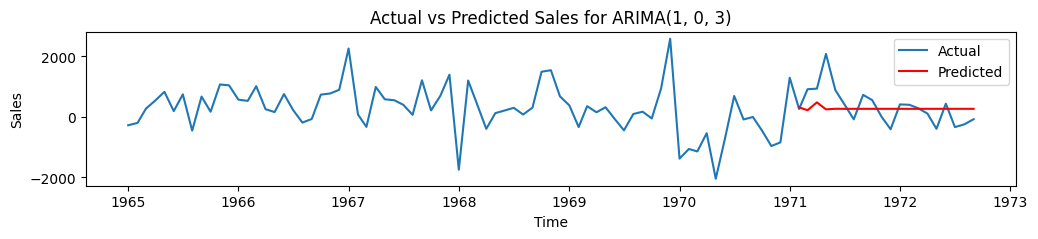

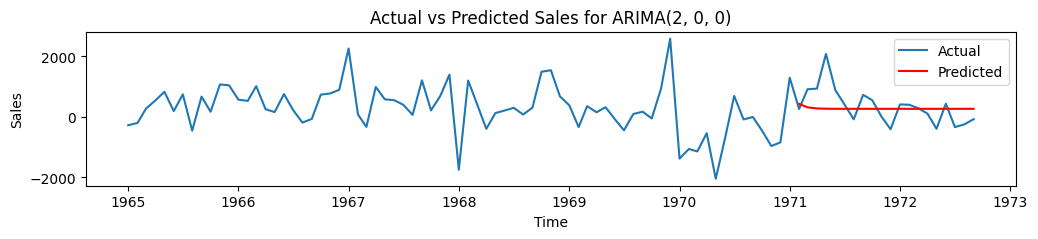

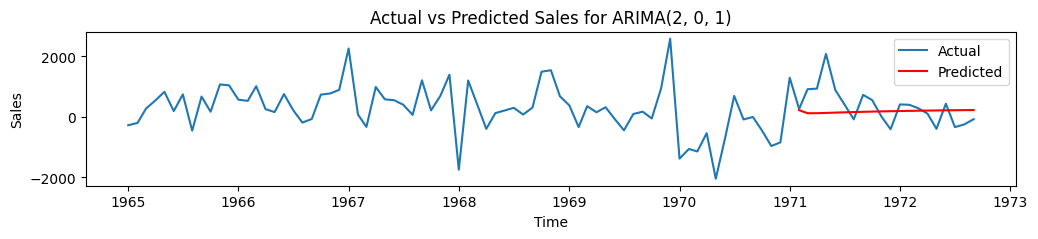

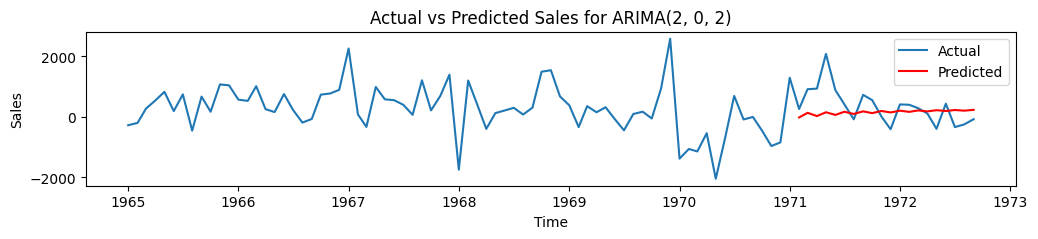

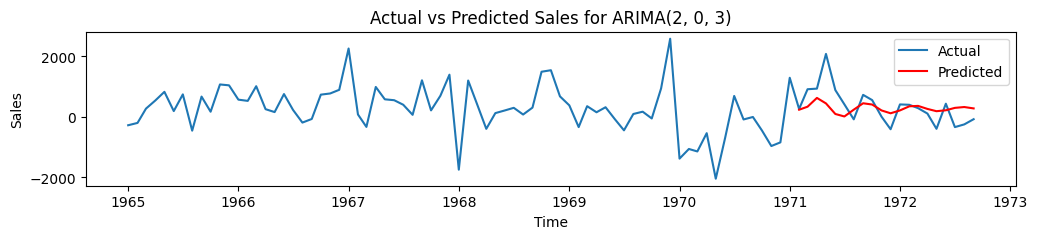

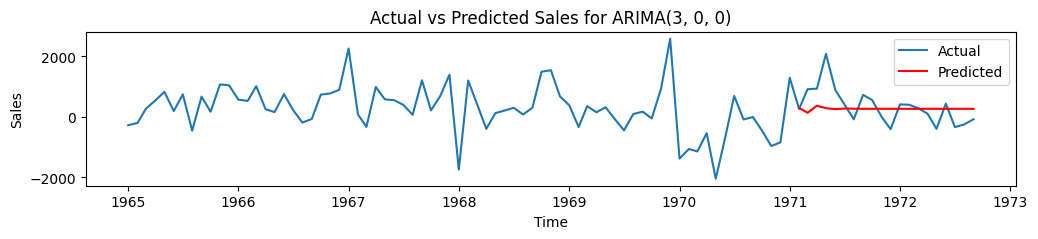

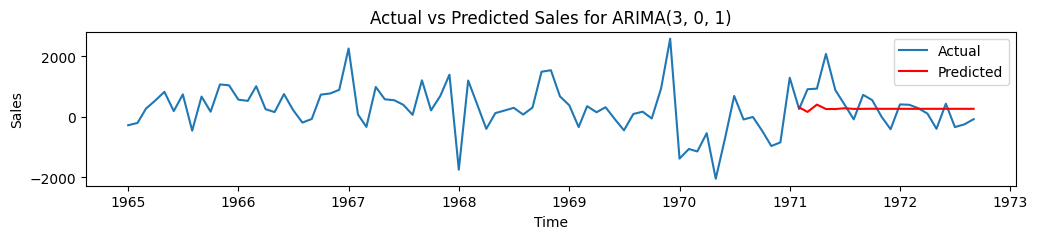

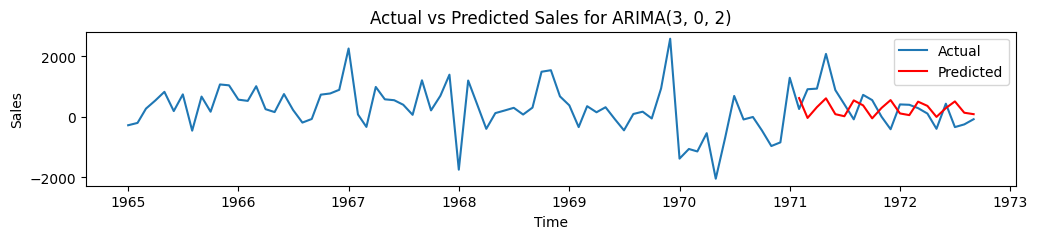

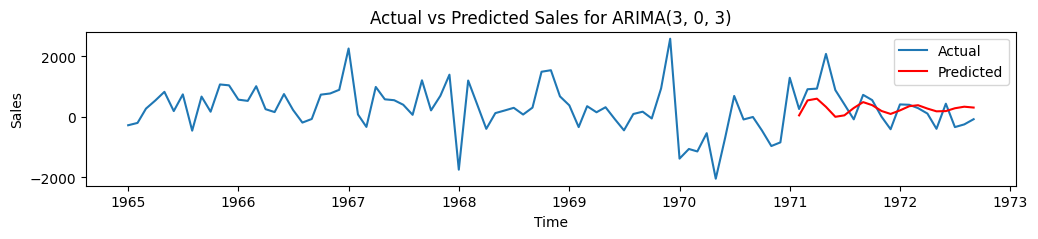

The best model is ARIMA(2, 0, 3), MSE = 286280.5953123171
                               SARIMAX Results                                
Dep. Variable:          Sales_Diff_12   No. Observations:                   85
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -588.400
Date:                Thu, 25 Sep 2025   AIC                           1190.801
Time:                        14:42:45   BIC                           1207.899
Sample:                    01-01-1964   HQIC                          1197.678
                         - 01-01-1971                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        268.9865    159.919      1.682      0.093     -44.448     582.421
ar.L1          0.6498      0.202      3.223      0.001       0.255       

In [33]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import itertools

#定义p, d和q参数，取0到4之间的任意值
p = q = range(0, 4)

# 生成p, d和q三元组的所有不同组合
pdq = [(x[0], 0, x[1]) for x in list(itertools.product(p, q))]


# 将数据分为训练集和测试集
train_data = df['Sales_Diff_12'].iloc[:-20]
test_data = df['Sales_Diff_12'].iloc[-20:]


# 初始化最佳模型及其参数和MSE值
best_model = None
best_param = None
best_mse = float('inf')

# 对每一种参数组合进行迭代
for param in pdq:
    try:
        # 实例化ARIMA模型
        model = ARIMA(train_data, order=param)
        model_fit = model.fit()
        
        # 进行预测
        predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
        
        # 计算MSE
        mse = mean_squared_error(test_data, predictions)
        
        # 如果当前模型的MSE比最佳MSE小，更新最佳模型、参数和MSE
        if mse < best_mse:
            best_model = model_fit
            best_param = param
            best_mse = mse
        
        # 绘制真实值和预测值
        plt.figure(figsize=(12, 2))
        plt.plot(df.index, df['Sales_Diff_12'], label='Actual')
        plt.plot(df.index[-20:], predictions, color='red', label='Predicted')
        
        # 添加标题和标签
        plt.title('Actual vs Predicted Sales for ARIMA{}'.format(param))
        plt.xlabel('Time')
        plt.ylabel('Sales')
        plt.legend()
        
        # 显示图形
        plt.show()
        
    except Exception as e:
        print('Error:', e)
        continue

# 打印出最优模型的参数及其MSE
print(f'The best model is ARIMA{best_param}, MSE = {best_mse}')

# 打印最优模型的摘要
print(best_model.summary(alpha=0.05))

ARIMA(0, 1, 0, 12) - AIC:1192.6081349523326


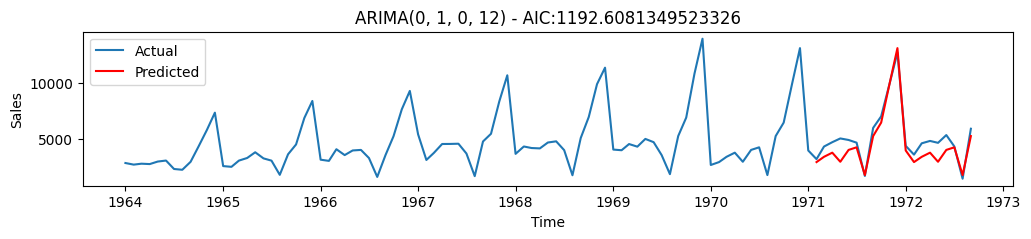

ARIMA(0, 1, 1, 12) - AIC:1193.466596652626


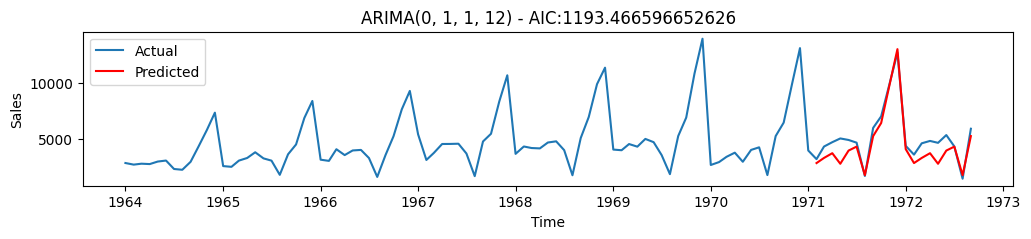

ARIMA(0, 1, 2, 12) - AIC:1189.4211894265952


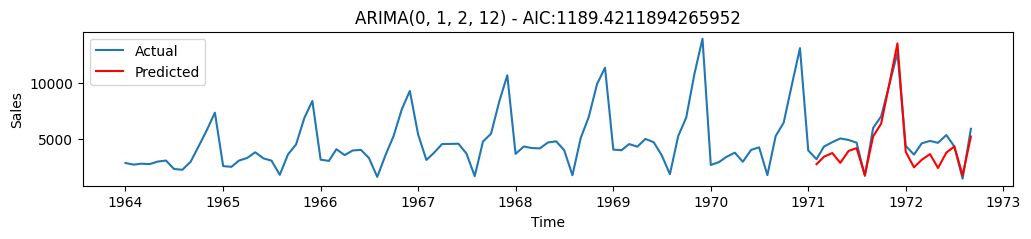

ARIMA(1, 1, 0, 12) - AIC:1193.1886812397997


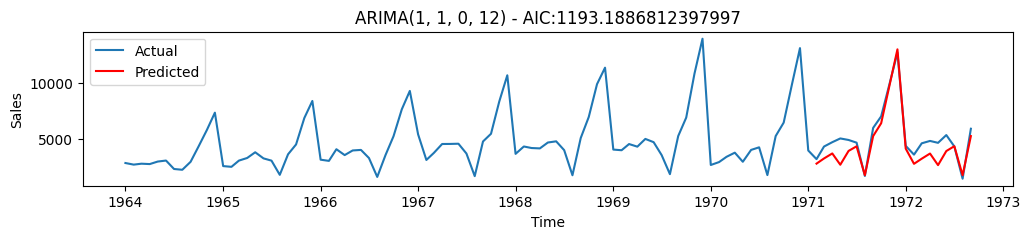

ARIMA(1, 1, 1, 12) - AIC:1188.828536404402


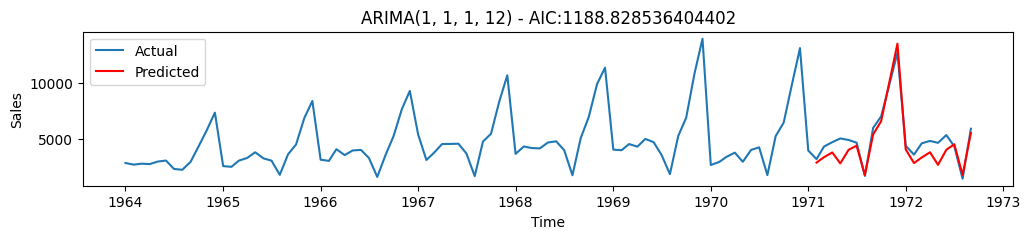

ARIMA(1, 1, 2, 12) - AIC:1184.9479415199003


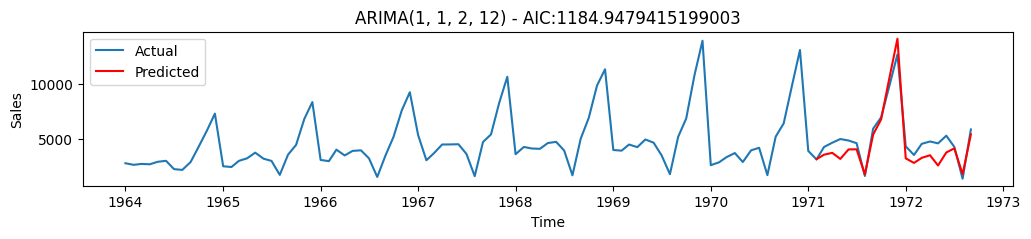

ARIMA(2, 1, 0, 12) - AIC:1186.5350937296857


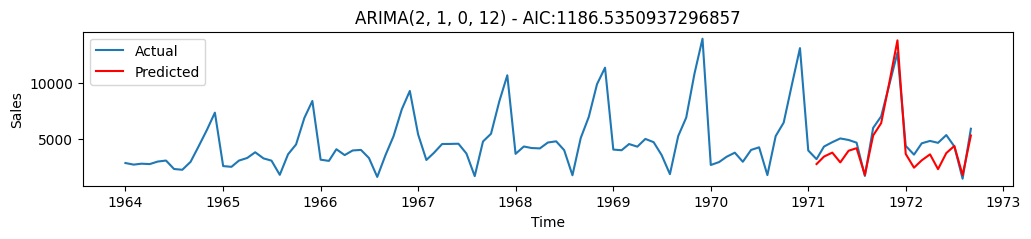

ARIMA(2, 1, 1, 12) - AIC:1186.4490177034434


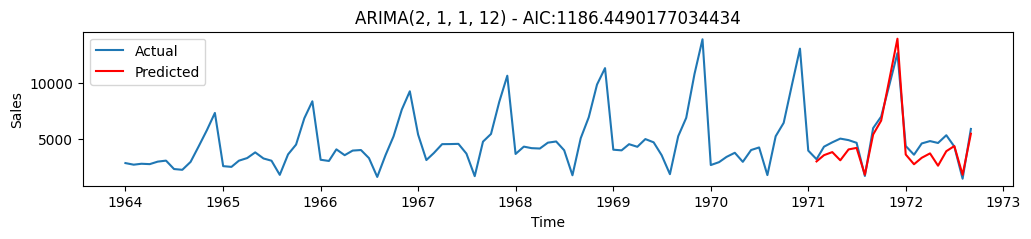

ARIMA(2, 1, 2, 12) - AIC:1182.4033217726435


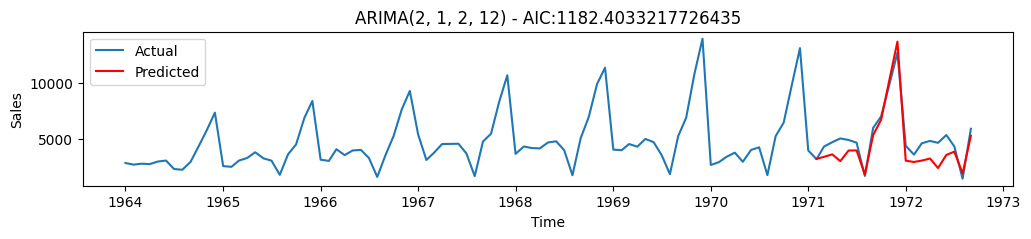


The best model is ARIMA(2, 1, 2, 12), AIC = 1182.4033217726435
                                  SARIMAX Results                                  
Dep. Variable:                       Sales   No. Observations:                   85
Model:             ARIMA(2, 1, [1, 2], 12)   Log Likelihood                -586.202
Date:                     Thu, 25 Sep 2025   AIC                           1182.403
Time:                             14:42:48   BIC                           1193.856
Sample:                         01-01-1964   HQIC                          1186.967
                              - 01-01-1971                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.005      0.995]
------------------------------------------------------------------------------
ar.S.L12       1.1186      0.308      3.636      0.000       0.326       1.911
ar.S.L24      -0.4591      

In [34]:
import warnings
warnings.filterwarnings("ignore")  
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  
import itertools

# 定义季节性参数 P 和 Q，取0到2之间的任意值
P = Q = range(0, 3)  # D固定为1
s = 12  # 季节性周期，这里设置为12，表示年度季节性

# 生成P和Q的组合，并创建季节性参数列表
seasonal_pdq = [(x[0], 1, x[1], s) for x in list(itertools.product(P, Q))]


# 将数据分为训练集和测试集
train_data = df['Sales'][:-20]  
test_data = df['Sales'].iloc[-20:]  

best_model = None  # 初始化最优模型
best_seasonal_param = None  # 初始化最优季节性参数
best_aic = float('inf')  # 初始化最优模型的AIC值，初始值设置为无穷大

# 对所有的季节性参数组合进行遍历
for seasonal_param in seasonal_pdq:
    try:
        # 建立季节性ARIMA模型
        model = ARIMA(endog = train_data, seasonal_order=seasonal_param)  
        model_fit = model.fit()  # 拟合模型

        aic = model_fit.aic  # 获取当前模型的AIC值

        # 如果当前模型的AIC小于最优AIC，则更新最优模型、最优季节性参数和最优AIC
        if aic < best_aic:
            best_model = model_fit
            best_seasonal_param = seasonal_param
            best_aic = aic

        print(f'ARIMA{seasonal_param} - AIC:{aic}')

        # 生成预测结果的开始时间和结束时间
        start = len(train_data)
        end = start + len(test_data) - 1

        # 使用当前模型进行预测
        predictions = model_fit.predict(start=start, end=end, dynamic=True)

        # 画图展示真实值和预测值
        plt.figure(figsize=(12, 2))
        plt.plot(df.index[:end + 1], df['Sales'].iloc[:end + 1], label='Actual')
        plt.plot(df.index[start:end + 1], predictions, color='red', label='Predicted')

        plt.title(f'ARIMA{seasonal_param} - AIC:{aic}')
        plt.xlabel('Time')
        plt.ylabel('Sales')
        plt.legend()

        plt.show()

    except Exception as e:
        # 如果建立模型或者拟合模型出错，打印出错误信息
        print('Error:', e)
        continue

# 打印出最优模型的季节性参数和AIC
print(f'\nThe best model is ARIMA{best_seasonal_param}, AIC = {best_aic}')

# 打印最优模型的摘要信息
print(best_model.summary(alpha=0.01))

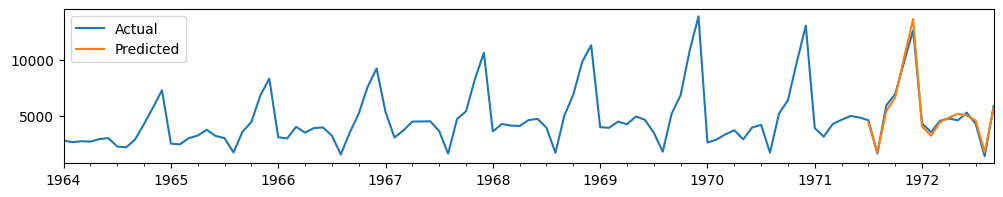

                                SARIMAX Results                                 
Dep. Variable:                    Sales   No. Observations:                  105
Model:             ARIMA(1, 1, [1], 12)   Log Likelihood                -750.716
Date:                  Thu, 25 Sep 2025   AIC                           1507.432
Time:                          14:42:48   BIC                           1515.030
Sample:                      01-01-1964   HQIC                          1510.500
                           - 09-01-1972                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.005      0.995]
------------------------------------------------------------------------------
ar.S.L12       0.9804      0.127      7.708      0.000       0.653       1.308
ma.S.L12      -0.9228      0.281     -3.286      0.001      -1.646      -0.199
sigma2      5.969e+05   1.06e+05    

In [35]:
def sarima_model(data, seasonal_order):

    model = ARIMA(endog=data, seasonal_order=seasonal_order)
    model_fit = model.fit()


    df_plot = pd.DataFrame()
    df_plot["Actual"] = data
    df_plot["Predicted"] = model_fit.predict(start=90, end=104, dynamic=True)

  
    df_plot[['Actual','Predicted']].plot(figsize=(12,2))
    plt.show()

    print(model_fit.summary(alpha=0.01))


sarima_model(df['Sales'], (1,1,1,12))

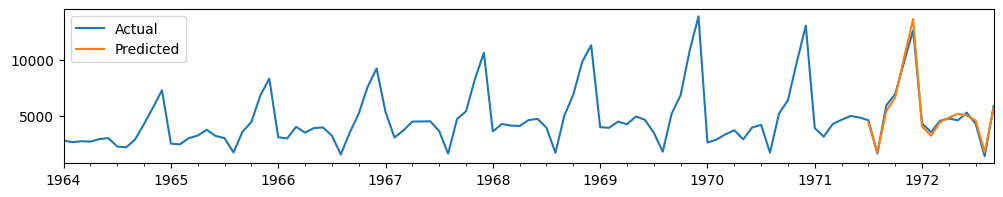

                                SARIMAX Results                                 
Dep. Variable:                    Sales   No. Observations:                  105
Model:             ARIMA(1, 1, [1], 12)   Log Likelihood                -750.716
Date:                  Thu, 25 Sep 2025   AIC                           1507.432
Time:                          14:42:49   BIC                           1515.030
Sample:                      01-01-1964   HQIC                          1510.500
                           - 09-01-1972                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.005      0.995]
------------------------------------------------------------------------------
ar.S.L12       0.9804      0.127      7.708      0.000       0.653       1.308
ma.S.L12      -0.9228      0.281     -3.286      0.001      -1.646      -0.199
sigma2      5.969e+05   1.06e+05    

In [36]:
import pickle

def sarima_model(data, seasonal_order):
    # 训练模型
    model = ARIMA(endog=data, seasonal_order=seasonal_order)
    model_fit = model.fit()

    # 保存模型到文件
    pickle.dump(model_fit, open("model.pkl","wb"))

    df_plot = pd.DataFrame()
    df_plot["Actual"] = data
    df_plot["Predicted"] = model_fit.predict(start=90, end=104, dynamic=True)

    df_plot[['Actual','Predicted']].plot(figsize=(12,2))
    plt.show()

    print(model_fit.summary(alpha=0.01))

sarima_model(df['Sales'], (1,1,1,12))

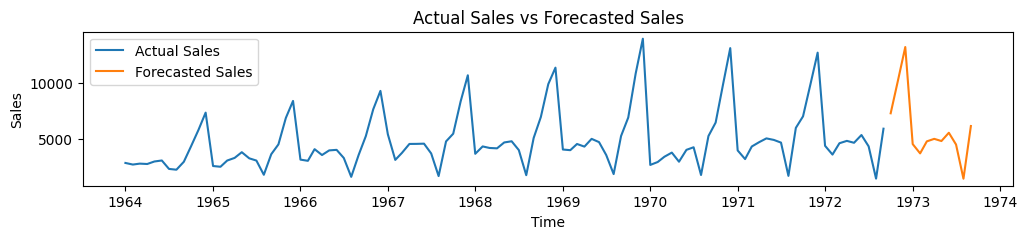

In [37]:
# 加载模型
loaded_model = pickle.load(open("model.pkl","rb"))

# 使用加载的模型进行预测
forecast = loaded_model.predict(start=len(df), end=len(df)+11, dynamic=True)


# 创建新的日期索引
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')


# 创建预测结果的DataFrame，并将新的日期索引赋给它
forecast_df = pd.DataFrame(forecast.values, index=forecast_index, columns=['Forecast'])


# 将原始数据与预测数据拼接在一起
df_plot = pd.concat([df['Sales'], forecast_df], axis=1)

plt.figure(figsize=(12, 2))

# 绘制原始销售数据
plt.plot(df['Sales'], label='Actual Sales')

# 绘制预测销售数据
plt.plot(forecast_df, label='Forecasted Sales')

plt.title('Actual Sales vs Forecasted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()